# Making generated slitherlinks harder

In the previous blog post, we saw how to create slitherlink puzzles.  As a refresher, here are the rules of slitherlink:

*  If there is a number X in a cell, there must be exactly X filled-in edges around the number.
*  All the filled-in edges in a puzzle must join together to form a single continuous loop, without self-intersections.

A slitherlink puzzle should also only have one solution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Code from last time
(Actually, the code has been modified to treat the puzzle as a class
and be able to draw edges on the board.

In [ ]:
def display_slitherlink_clues(
        solution: "0/1 numpy array"
    ) -> "(fig, ax) tuple for plotted figure":
        fig, ax = plt.subplots(figsize=(6, 6))
        shape = solution.shape
        grid = get_clues_from_solution(solution)
        ax.imshow(solution)
        for i in range(shape[0]):
            for j in range(shape[1]):
                text = ax.text(j, i, int(grid[i, j]),
                    ha="center", va="center", color="gray")
        return (fig, ax)
    
def display_slitherlink_solution(
    grid: "0/1 numpy array"
) -> "(fig, ax) tuple for plotted figure":
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(grid)
    return (fig, ax)

In [ ]:
class Slitherlink:
    def __init__(
        self,
        in_outs: "m by n matrix",
        clues: "m by n matrix",
        horiz_edges: "m+1 by n matrix",
        verti_edges: "m by n+1 matrix"
    ):
        """
        The matrix values are:
        -1 for unknown,
        0 for no edge/outside,
        1 for edge/inside
        
        Except for `clues`, which contains the
        value of the clue, and -1 for unkown
        """
        self.in_outs = in_outs
        self.clues = clues
        self.horiz_edges = horiz_edges
        self.verti_edges = verti_edges
       
    @classmethod
    def from_solution(
        cls,
        in_outs: "m by n matrix"
    ):
        r, c = in_outs.shape
        clues = get_clues_from_solution(in_outs)
        horiz_edges = -1 * np.ones((r+1, c))
        verti_edges = -1 * np.ones((r, c+1))
        return Slitherlink(
            in_outs,
            clues,
            horiz_edges,
            verti_edges
        )
    
    def copy(self) -> Slitherlink:
        return Slitherlink(
            self.in_outs.copy(),
            self.clues.copy(),
            self.horiz_edges.copy(),
            self.verti_edges.copy()
        )
        
    def make_display(
        self,
        fig: "Optional figure" = None,
        ax: "Optional axis" = None
    ) -> "(fig, ax)":
        # Display the Slitherlink as a matplotlib plot
        # for use in _ipython_display_ but also if
        # we want to grab the fig/axes for later editing
        if fig is None or ax is None:
            fig, ax = plt.subplots(figsize=(6, 6))
        if fig is not None and ax is None:
            raise Exception("Both fig/ax must be given, or neither")
        if fig is None and ax is not None:
            raise Exception("Both fig/ax must be given, or neither")
        r, c = self.in_outs.shape
        
        # Draw in/outs
        ax.imshow(self.in_outs)
        
        # Draw clues
        for i in range(r):
            for j in range(c):
                txt = str(int(self.clues[i, j]))
                if txt == "-1":
                    txt = " "
                ax.text(
                    j,
                    i,
                    txt,
                    ha="center",
                    va="center",
                    color="gray"
                )
                
        # Draw horizontal edges
        for i in range(r+1):
            for j in range(c):
                if self.horiz_edges[i, j] == -1:
                    continue
                elif self.horiz_edges[i, j] == 0:
                    ax.text(
                        j,
                        i-0.5,
                        'x',
                        ha="center",
                        va="center",
                        color="g"
                    )
                elif self.horiz_edges[i, j] == 1:
                    ax.axline((j, i-0.5), (j+0.1, i-0.5), color='g', linewidth=7)
                    
        # Draw vertical edges
        for i in range(r):
            for j in range(c+1):
                if self.verti_edges[i, j] == -1:
                    continue
                elif self.verti_edges[i, j] == 0:
                    ax.text(
                        j,
                        i-0.5,
                        'x',
                        ha="center",
                        va="center",
                        color="g"
                    )
                elif self.verti_edges[i, j] == 1:
                    ax.axline((j-0.5, i), (j-0.5, i+0.1), color='g', linewidth=7)
                
        return (fig, ax)
        
    def _ipython_display_(self):
        # Display the Slitherlink as a matplotlib plot
        self.make_display()

In [ ]:
def get_neighbors(ck, shape):
    neighbors = [
        (ck[0], ck[1]-1),
        (ck[0], ck[1]+1),
        (ck[0]-1, ck[1]),
        (ck[0]+1, ck[1])
    ]
    neighbors = [
        neighbor for neighbor in neighbors
        if neighbor[0] >= 0
        and neighbor[0] < shape[0]
        and neighbor[1] >= 0
        and neighbor[1] < shape[1]
    ]
    return neighbors

def get_neighbors_with_diags(ck, shape):
    neighbors = [
        (
            (ck[0]-1, ck[1]-1),
            (
                (ck[0], ck[1]-1),
                (ck[0]-1, ck[1])
            )
        ),
        (
            (ck[0]-1, ck[1]+1),
            (
                (ck[0], ck[1]+1),
                (ck[0]-1, ck[1])
            )
        ),
        (
            (ck[0]+1, ck[1]-1),
            (
                (ck[0], ck[1]-1),
                (ck[0]+1, ck[1])
            )
        ),
        (
            (ck[0]+1, ck[1]+1),
            (
                (ck[0], ck[1]+1),
                (ck[0]+1, ck[1])
            )
        )
    ]
    def valid(neigh, shape):
        return (
            neigh[0] >= 0
            and neigh[0] < shape[0]
            and neigh[1] >= 0
            and neigh[1] < shape[1]
        )
        
    neighbors = [
        (dia, (neigh1, neigh2)) for (dia, (neigh1, neigh2)) in neighbors
        if valid(neigh1, shape) and valid(neigh2, shape)
    ]
    return neighbors

def border_cell_is_valid(
    border_cell: ((int, int), int),
    solution: "0/1 numpy array with 1s being inside cells",
    verbose: bool = False
) -> bool:
    # Since as things change places that used to be border cells
    # are no longer border cells, we should return False if
    # it is no longer inside the loop
    cell = border_cell[0]
    shape = solution.shape
    if solution[cell] == 0:
        if verbose: print("empty")
        return False
    
    # Can't fold inwards if one of the new corners
    # borders an empty cell
    # I.e. can't be diagonally adjacent from an empty cell unless
    # there is an empty cell already between them.
    for dia, (neigh1, neigh2) in \
        get_neighbors_with_diags(cell, shape):
        
        if solution[dia] == 0:
            if solution[neigh1] == 1 and solution[neigh2] == 1:
                if verbose: print("dia")
                return False
            
    # Can't fold inwards if like:
    #
    #  0 1 0
    #  0 * 0
    #  0 1 0
    # 
    # Note: if I remove the last two conditions from the following if statements,
    # then it is the start of a nurikabe generator!
    if (
        # Above is a 0
        (cell[0]-1 < 0 or solution[cell[0]-1, cell[1]] == 0)
        # Below is a 0
        and (cell[0]+1 >= shape[0] or solution[cell[0]+1, cell[1]] == 0)
        # Left is a 1
        and (cell[1]-1 >= 0 and solution[cell[0], cell[1]-1] == 1)
        # Right is a 1
        and (cell[1]+1 < shape[1] and solution[cell[0], cell[1]+1] == 1)
    ):
            if verbose: print("pinch ab")
            return False
    if (
        # Left is a 0
        (cell[1]-1 < 0 or solution[cell[0], cell[1]-1] == 0)
        # Right is a zero
        and (cell[1]+1 >= shape[1] or solution[cell[0], cell[1]+1] == 0)
        # Above is a 1
        and (cell[0]-1 >= 0 and solution[cell[0]-1, cell[1]] == 1)
        # Below is a 1
        and (cell[0]+1 < shape[0] and solution[cell[0]+1, cell[1]] == 1)
    ):
            if verbose: print("pinch lr")
            return False
    
    # Can't be valid to remove if it has no inside adjacents
    # This shouldn't trigger except in trivial cases
    if border_cell[1] == 0:
        return False
    return True

def random_slitherlink(
    shape: ("height", "width"),
    target_ratio: float = 2,
    area_ratio: float = 0.5
) -> "0/1 numpy array with shape `shape`":
    
    # Initialize to full loop
    solution = np.ones(shape)
    
    # Get all cells bordering
    border_cells: (dict, "(x, y): # outside cells it borders")
    border_cells = set(
        [(0, j) for j in range(shape[1])]
        + [(shape[0]-1, j) for j in range(shape[1])]
        + [(i, 0) for i in range(shape[0])]
        + [(i, shape[1]-1) for i in range(shape[0])]
    )
    border_cells = {
        cell: 3
        for cell in border_cells
    }
    border_cells[(0, 0)] = 2
    border_cells[(shape[0]-1, 0)] = 2
    border_cells[(0, shape[1]-1)] = 2
    border_cells[(shape[0]-1, shape[1]-1)] = 2
    total_weight = sum(border_cells.values())
    
    # Initialize circ-area ratio
    circumference = 2 * (shape[0] + shape[1])
    max_area = shape[0] * shape[1]
    area = max_area
    circ_area_ratio = circumference / area
    
    while circ_area_ratio < target_ratio and area / max_area > area_ratio:
        # Pick a random border_cell, by weight
        border_cells_by_weight = {
            key: value
            for key, value in border_cells.items()
            if border_cell_is_valid((key, value), solution)
        }
        total_weight = sum(border_cells_by_weight.values())
        border_cells_by_weight = {
            key: value / total_weight
            for key, value in border_cells_by_weight.items()
        }
        if len(border_cells_by_weight) == 0:
            print("Out of valid cells to remove")
            break
        rando = np.random.random()
        chosen_key: "The cell to fold in on itself" = None
        for key, value in border_cells_by_weight.items():
            rando -= value
            if rando <= 0:
                chosen_key = key
                break
                
        if chosen_key is None:
            raise Exception("No key chosen")
        
        if solution[chosen_key] == 0:
            raise Exception("Cell removed twice")
        solution[chosen_key] = 0
        inner_neighbors = border_cells[chosen_key]
        
        # Update neighbors
        neighbors = get_neighbors(chosen_key, shape)
        
        # Every adjacent cell should loose 1 from its value
        for neighbor in neighbors:
            if neighbor not in border_cells:
                neigh_neighbors = get_neighbors(neighbor, shape)
                border_cells[neighbor] = sum(
                    solution[neigh_neighbor]
                    for neigh_neighbor in neigh_neighbors
                )
            else:
                border_cells[neighbor] -= 1
        
        # Update values for the next loop
        circumference += inner_neighbors
        area -= 1
        circ_area_ratio = circumference / area
    
    return solution

def get_clues_from_solution(solution):
    right = np.pad(solution[:, 1:], ((0, 0), (0, 1)), constant_values=0)
    left = np.pad(solution[:, :-1], ((0, 0), (1, 0)), constant_values=0)
    down = np.pad(solution[1:, :], ((0, 1), (0, 0)), constant_values=0)
    up = np.pad(solution[:-1, :], ((1, 0), (0, 0)), constant_values=0)
    clues = (left + right + up + down)
    
    # For outside cells, borders are other way round
    clues[solution == 1] = 4 - clues[solution == 1]
    return clues

## And now, the continuation

Ultimately, we could create puzzles like this:

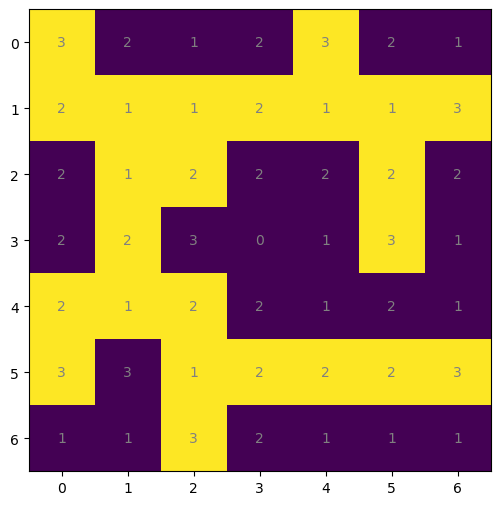

In [ ]:
slitherlink = Slitherlink.from_solution(random_slitherlink(
    (7, 7),
    target_ratio = 3.5
))
slitherlink

However, this puzzle is trivial.  First of all, because the inside/outside (yellow/blue) cells are given as hints, you can just trace the outline to get the solution.  However, even if we ignore that, having every cell give a clue makes the puzzle far easier.  Typically, puzzles only have a few clues:

![Slitherlink](../images/003/slitherlink_example.png)

We could blindly remove a few clues, but we might then cause there to be multiple solutions (a big no-no).  Besides, if we remove enough clues, people would be forced to start guess-and-checking to solve.  This is typically unsatisfying - a good slitherlink should always have a deducible solution based only on logical deductions with bounded lookahead.  (By bounded lookahead, I mean there should only be a small amount of steps in advance that a solver should have to think through when considering a hypothesis).

The reason why I enjoy slitherlink is the invention of patterns.  For example, when there are two adjacent threes:

```
3 3
```

I know that there must be an edge between them.

```
3|3
```

Suppose there was no edge:

```
3.3
```

Then, because each three needs three edges, we would have:

```
 _ _
|3.3|
 ‾ ‾
```

Which forms a closed loop.  If those threes were the only clues on the board, it would be valid, but typically slitherlinks are larger than this and hence we would know that this solution could not happen.

As one plays slitherlink, they learn and create more and more patterns to aid in solving.  Some patterns involve knowning whether a cell is inside/outside the board, rather than just the lines.  For example, there is always an edge between an inside and an outside cell.  It would be nice to be able to guarantee that a generated puzzle is solvable with a supplied set of patterns.

Some patterns are 'global'; consider the following:

```
   x   |___
 _|.|______
|__________|
```

The x cell must not have an edge below it, as that would close off the loop (and in this case we can clearly see there are other parts of the puzzle that need connecting).  This pattern requires long-distance information, hence 'global'.  It would not be too hard to implement, by keeping track of whether two edges are part of the same loop segment; however, in this post we'll focus only on local patterns.

Every pattern has a precondition and a postcondition.  For the threes pattern, the precondition is:

```
3 3  and there is at least one edge on the board not touching the 3s
```

and the postcondition is:

```
3|3  and there is at least one edge on the board not touching the 3s.
```

In fact, the pattern can be taken further:

```
  .
|3|3|  and there is at least one edge on the board not touching the 3s.
  .
```

When using a pattern, we check if its precondition is satisfied, and if so we replace it with its postcondition.  There is no reason, however, why we can't start with a fully solved board and replace pattern postconditions with preconditions to make it more unsolved.  The precondition needs to be satisfied exactly when forwards propagating, but when backwards propagating we only need a partial match.

If we keep track of which clues are necessary when 'unsolving' the puzzle, then we can erase unused clues and know that we can reverse our chain of deductions to recover the original puzzle.

[[-1. -1. -1.]]
[[-1 -1 -1]]
[[-1. -1. -1.]]
[[-1 -1 -1]]
[[-1. -1. -1.]]
[[-1 -1 -1]]
[[-1. -1. -1.]]
[[-1 -1 -1]]
[[ 1. -1. -1.]]
[[-1 -1 -1]]
[[-1. -1. -1.]]
[[-1 -1 -1]]
[[-1. -1.]]
[[-1 -1 -1]]


/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_32625/311820010.py:162: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  verti_edges_match = (verti_edges == self.precondition.verti_edges)[


TypeError: 'bool' object is not subscriptable

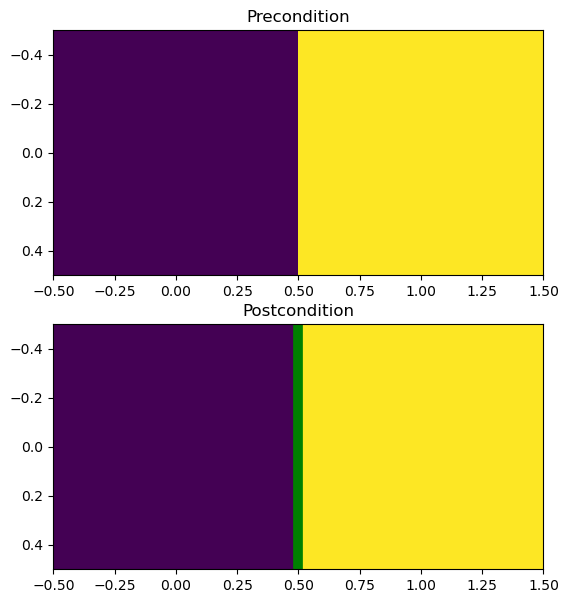

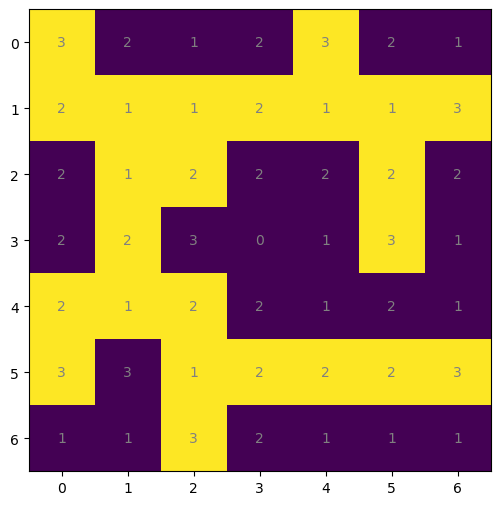

In [ ]:
class Condition(Slitherlink):
    """
    Just a class to specify a pre/postcondition
    """
    def __init__(
        self,
        in_outs: "m by n matrix",
        clues: "m by n matrix",
        horiz_edges: "m+1 by n matrix",
        verti_edges: "m by n+1 matrix"
    ):
        """
        The matrix values are:
        -1 for unknown,
        0 for no edge/outside,
        1 for edge/inside
        
        Except for `clues`, which contains the
        value of the clue, and -1 for unkown
        """
        self.in_outs = in_outs
        self.clues = clues
        self.horiz_edges = horiz_edges
        self.verti_edges = verti_edges
        
    def __repr__(self):
        """
        [a] means a (clue or empty) is inside
        )a( means a clue/empty is outside
        ¿a? means a clue/empty is unknown to be inside/outside
        
        | means edge
        x means no edge
          means unknown (empty space)
        """
        faces_mat = self.clues.astype(str)
        for r, c in np.ndindex(faces_mat.shape):
            fm = faces_mat[r, c]
            if fm == -1:
                fm = " "
            if self.in_outs[r, c] == 1:
                faces_mat[r, c] = f"[{fm}]"
            elif self.in_outs[r, c] == 0:
                faces_mat[r, c] = f"){fm}("
            elif self.in_outs[r, c] == -1:
                faces_mat[r, c] = f"¿{fm}?"
          
        # Place the initial horizontal edges
        if self.verti_edges[r, 0] == 1:
            out_str = "_"
        elif self.verti_edges[r, 0] == 0:
            out_str = "x"
        elif self.verti_edges[r, 0] == -1:
            out_str = " "
        out_str += "\n"
        for r in range(faces_mat.shape[0]):
            # Place the vertical edges
            if self.verti_edges[r, 0] == 1:
                out_str += "|"
            elif self.verti_edges[r, 0] == 0:
                out_str += "x"
            elif self.verti_edges[r, 0] == -1:
                out_str += " "
            out_str += "\n"
            # Place the below horizontal edges
            if self.verti_edges[r, 0] == 1:
                out_str = "_"
            elif self.verti_edges[r, 0] == 0:
                out_str = "x"
            elif self.verti_edges[r, 0] == -1:
                out_str = " "
            out_str += "\n"
            for c in range(faces_mat.shape[1]):
                out_str += f" {faces_mat[r, c]} "
                if self.verti_edges[r, c+1] == 1:
                    out_str += "|"
                elif self.verti_edges[r, c+1] == 0:
                    out_str += "x"
                elif self.verti_edges[r, c+1] == -1:
                    out_str += " "
            
            out_str += "\n"
                
        return out_str

class Pattern:
    def __init__(
        self,
        precondition: Condition,
        postcondition: Condition
    ):
        self.precondition = precondition
        self.postcondition = postcondition
        self.shape = precondition.in_outs.shape
        
    def __repr__(self):
        return (
            repr(self.precondition)
            + "\n\t|\n\t|\n\tv\n"
            + repr(self.postcondition)
        )
    
    def _ipython_display_(self):
        fig, (pre_ax, post_ax) = plt.subplots(figsize=(14, 7), nrows=2)
        self.precondition.make_display(fig, pre_ax)
        self.postcondition.make_display(fig, post_ax)
        pre_ax.set_title("Precondition")
        post_ax.set_title("Postcondition")
    
    def apply(
        self,
        slither: Slitherlink
    ) -> Slitherlink:
        """
        Replaces any instances of the precondition
        with the postcondition
        """
        slither = slither.copy()
        r, c = slither.in_outs.shape
        m, n = self.shape
        
        # Will have to edit to allow patterns on
        # edge of screen to properly consider off-grid cells.
        for x in range(r+1):
            for y in range(c+1):
                if self._apply_direct(
                    slither.in_outs[x:x+m, y:y+n],
                    slither.clues[x:x+m, y:y+n],
                    slither.horiz_edges[x:x+m+1, y:y+n],
                    slither.verti_edges[x:x+m, y:y+n+1]
                ):
                    slither.in_outs[x:x+m, y:y+n] = self.postcondition.in_outs
                    slither.clues[x:x+m, y:y+n] = self.postcondition.clues
                    slither.horiz_edges[x:x+m+1, y:y+n] = self.postcondition.horiz_edges
                    slither.verti_edges[x:x+m, y:y+n+1] = self.postcondition.verti_edges
        return slither
                
    def _apply_direct(
        self,
        in_outs: "m by n matrix",
        clues: "m by n matrix",
        horiz_edges: "m+1 by n matrix",
        verti_edges: "m by n+1 matrix"
    ) -> bool:
        """
        Check if pattern makes sense locally
        """
        
        # Need to check if they're equal wherever the precondition
        # is not negative 1.
        in_out_match = (in_outs == self.precondition.in_outs)[
            self.precondition.in_outs != -1
        ].all()
        clues_match = (clues == self.precondition.clues)[
            self.precondition.clues != -1
        ].all()
        horiz_edges_match = (horiz_edges == self.precondition.horiz_edges)[
            self.precondition.horiz_edges != -1
        ].all()
        verti_edges_match = (verti_edges == self.precondition.verti_edges)[
            self.precondition.verti_edges != -1
        ].all()
        
        if (
            in_out_match
            and clues_match
            and horiz_edges_match
            and verti_edges_match
        ):
            return True
        return False
        
        
WallSeparatesInnieOutie = Pattern(
    Condition(
        in_outs=np.array([[0, 1]]),
        clues=np.array([[-1, -1]]),
        horiz_edges=np.array([[-1, -1], [-1, -1]]),
        verti_edges=np.array([[-1, -1, -1]])
    ),
    Condition(
        in_outs=np.array([[0, 1]]),
        clues=np.array([[-1, -1]]),
        horiz_edges=np.array([[-1, -1], [-1, -1]]),
        verti_edges=np.array([[-1, 1, -1]])
    )
)
display(WallSeparatesInnieOutie)
display(slitherlink)
display(WallSeparatesInnieOutie.apply(slitherlink))